In [1]:
import tensorflow as tf
import numpy as np
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dense ,Flatten,LSTM,Bidirectional,Dropout
import pandas as pd
import re

In [2]:
def clean_text(text):
    Stopwords = stopwords.words('english')
    text = re.sub('\d','',text)
    text = re.sub('\W',' ',text)
    text = re.sub('\s+',' ',text)
    words = [word for word in text.split() if word not in Stopwords]
    return ' '.join(words)


In [3]:
data = pd.read_csv('bbc-text.csv')
articles = list(data['text'])
labels = list(data['category'])
cleaned_articles=[]
for i in range(len(articles)):
    cleaned_articles.append(clean_text(articles[i]))
whole_text = ' '.join(cleaned_articles).split()
unique_words = list(set(whole_text))
print(cleaned_articles[:2])
print(labels[:2])
print(len(unique_words))

['tv future hands viewers home theatre systems plasma high definition tvs digital video recorders moving living room way people watch tv radically different five years time according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes us leading trend programmes content delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices one talked technologies ces digital personal video recorders dvr pvr set top boxes like us tivo uk sky system allow people record store play pause forward wind tv programmes want essentially technology allows much personalised tv also built high definition tv sets big business japan us slower take europe lack high definition programming people forward wind adverts also forget abiding network channel schedules putting together la carte entertainment us networks cable satellite companies worried means terms advertising revenues w

In [5]:
vocab_size=5000
max_length = 400
embedding_dim = 64
trunc_type = 'post'
padding_type = 'post'
tk = Tokenizer(num_words = vocab_size,oov_token='<OOV>')
tk.fit_on_texts(cleaned_articles)
word_index = tk.word_index
X = tk.texts_to_sequences(cleaned_articles)
X = pad_sequences(X, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(X[:2])

[[  82  154 1093 1154   46 1059  690 4966   73 1013 4061  128  161 3926
  1274 1242 1510   40    7  891   82    1  300   79   19   14  121 2970
  1261 2385  539  388 1208   62 2814 2895 1663    8  840  703   10  894
     1    9  609 1494  993  384 1895 1154  726   46  465 1417 2002 1563
   116  304  106 2601  764 4967 1027  568   10 4201  840 2442  128  323
   161 3926    1    1   37   61 3056   26    9    1   18 1323  126  420
     7  119 1324   70 4378  453 4968   82  993   75    1   71 2003   53
     1   82    6 1060   73 1013   82 1867  129  139  389    9 2734   39
   130 1155   73 1013 4202    7  453 4968 2971    6 2550    1  381 1036
     1 1302  574 1969    1  704    9  465 1417 2002  116 1818  379  841
  1970 1531   36 1724 2443 4762    1 2386  226    9 2495   71  765    6
  1028 1070  130  745  540    1  117   26 1323 1725  412   77  895  101
    19   14   18 3230    1   35 1377    1   23   35   85  333 2272   35
   431  218 1970 1303  312    1  297  765 1071   18 2496 1724   

In [6]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)


y = np.array(label_tokenizer.texts_to_sequences(labels))

print(y[:2])

[[4]
 [2]]


Using TensorFlow backend.


In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [8]:
model = Sequential()
model.add(Embedding(vocab_size,64))
model.add(Dropout(0.25))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(6,activation='softmax'))
model.summary()

opt = tf.keras.optimizers.Adam(lr=0.001,decay = 1e-6)
model.compile(loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'],optimizer=opt)
history=model.fit(X_train,y_train, epochs=10,validation_data=(X_test, y_test))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
dropout (Dropout)            (None, None, 64)          0         
____________________________________________________________

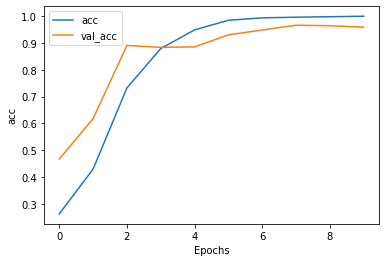

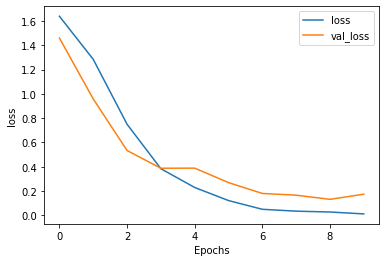

In [10]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")

In [28]:
test_sample = [cleaned_articles[506]]
print(test_sample)
test_sequence = tk.texts_to_sequences(test_sample)
test_sequence = pad_sequences(test_sequence,maxlen = max_length)
labels = ['sport', 'bussiness', 'politics', 'tech', 'entertainment'] #orig
prediction = model.predict(test_sequence)

print("\nPrediction : ",labels[np.argmax(prediction)-1])

['chelsea clinch cup extra time extra time score mins john arne riise volleyed liverpool ahead seconds steven gerrard scored th minute goal blues boss jose mourinho sent taunting liverpool fans goal watched television side went win game drogba kezman scored close range antonio nunez header made tense finale amazing climax gave mourinho first silverware chelsea manager yet controversial mourinho sending apparently putting finger lips hush liverpool fans hushing extraordinary opening reds took stunning lead inside first minute riise could connected better morientes cross smashed left foot volley past petr cech goal quickest ever league cup final stunned blues side whose previously rock solid confidence shaken consecutive losses newcastle barcelona previous week blues attacking chances limited jerzy dudek equal frank lampard powerfully struck drive drogba low shot despite frustration chelsea began dominate midfield without seriously threatening break liverpool well organised defence joe c